<a href="https://colab.research.google.com/github/Tuevu110405/Module5_1st_step_toDL/blob/feature%2Fsoftmax_regression/Softmax.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!gdown 1NwikiUU_Yzom-l4Kwy24Cn-bG46gMmG4

Downloading...
From (original): https://drive.google.com/uc?id=1NwikiUU_Yzom-l4Kwy24Cn-bG46gMmG4
From (redirected): https://drive.google.com/uc?id=1NwikiUU_Yzom-l4Kwy24Cn-bG46gMmG4&confirm=t&uuid=dcf3d41b-d22e-44e6-bfa5-96981d07f58e
To: /content/creditcard.csv
100% 151M/151M [00:03<00:00, 48.0MB/s]


In [ ]:
!gdown 1GR3IwbvKNuiVXN5E5eMGyEQtT4pP7kCt

Downloading...
From: https://drive.google.com/uc?id=1GR3IwbvKNuiVXN5E5eMGyEQtT4pP7kCt
To: /content/Twitter_Data.csv
100% 20.9M/20.9M [00:00<00:00, 59.7MB/s]


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [ ]:
dataset_path = 'creditcard.csv'
df = pd.read_csv(dataset_path)

In [ ]:
dataset_arr = df.to_numpy()
X, y = dataset_arr[:, :-1].astype(np.float64), dataset_arr[:, -1].astype(np.uint8) # Changed np.unit8 to np.uint8

In [ ]:
intercept = np.ones((X.shape[0], 1))
X = np.concatenate((intercept, X), axis=1)

In [ ]:
n_classes = np.unique(y, axis=0).shape[0]
n_samples = y.shape[0]

y_encoded = np.array(
    [np.zeros(n_classes) for _ in range(n_samples)]
)

y_encoded[np.arange(n_samples), y] = 1


In [ ]:
val_size = 0.2
test_size = 0.125
random_state = 2
is_shuffle = True

X_train, X_val, y_train, y_val = train_test_split(
    X, y_encoded, test_size=val_size, random_state=random_state, shuffle=is_shuffle
)
X_train, X_test, y_train, y_test = train_test_split(
    X_train, y_train, test_size=test_size, random_state=random_state, shuffle=is_shuffle
)



In [ ]:
normalizer = StandardScaler()
X_train[:, 1:] = normalizer.fit_transform(X_train[:, 1:])
X_val[:, 1:] = normalizer.transform(X_val[:, 1:])
X_test[: , 1:] = normalizer.transform(X_test[:,1:])

In [1]:
def softmax(z):
    exp_z = np.exp(z)
    return exp_z /exp_z.sum(axis = 1)[:,None]

In [2]:
def predict(X, theta):
    z = np.dot(X, theta)
    y_hat = softmax(z)

    return y_hat

In [3]:
def compute_loss(y_hat, y):
    n = y.size

    return (-1/n) * np.sum(y * np.log(y_hat))

In [4]:
def compute_gradient(X, y, y_hat):
    n = y.size

    return (1/n) * np.dot(X.T, y_hat - y)


In [5]:
def update_theta(theta, gradient, learning_rate):
    return theta - learning_rate * gradient

In [6]:
def compute_accuracy(X, y, theta):
    y_hat = predict(X, theta)
    acc = (np.argmax(y_hat, axis=1) == np.argmax(y, axis=1)).mean()

    return acc

In [ ]:
lr = 0.01
epochs = 30
batch_size = 1024
n_features = X_train.shape[1]

np.random.seed(random_state)
theta = np.random.uniform(
    size = (n_features, n_classes)
)

In [ ]:
train_accs = []
train_losses = []
val_accs = []
val_losses = []

for epoch in range(epochs):
    train_batch_losses = []
    train_batch_accs = []
    val_batch_losses = []
    val_batch_accs = []

    for i in range(0, X_train.shape[0], batch_size):
        X_i = X_train[i : i + batch_size]
        y_i = y_train[i : i + batch_size]

        y_hat = predict(X_i, theta)

        train_loss = compute_loss(y_hat, y_i)

        gradient = compute_gradient(X_i, y_i, y_hat)

        theta = update_theta(theta, gradient, lr)

        train_batch_losses.append(train_loss)

        train_acc = compute_accuracy(X_train, y_train, theta)
        train_batch_accs.append(train_acc)

        y_val_hat = predict(X_val, theta)
        val_loss = compute_loss(y_val_hat, y_val)
        val_batch_losses.append(val_loss)

        val_acc = compute_accuracy(X_val, y_val, theta)
        val_batch_accs.append(val_acc)

    train_batch_loss = np.mean(train_batch_losses)
    train_batch_acc = np.mean(train_batch_accs)
    val_batch_loss = np.mean(val_batch_losses)
    val_batch_acc = np.mean(val_batch_accs)

    train_losses.append(train_batch_loss)
    val_losses.append(val_batch_loss)
    train_accs.append(train_batch_acc)
    val_accs.append(val_batch_acc)

    print(f'\nEPOCH { epoch + 1}:\tTraining loss : { train_batch_loss :.3f}\ tValidation loss : {val_batch_loss:.3f}')




EPOCH 1:	Training loss : 0.300\ tValidation loss : 0.297

EPOCH 2:	Training loss : 0.176\ tValidation loss : 0.174

EPOCH 3:	Training loss : 0.115\ tValidation loss : 0.113

EPOCH 4:	Training loss : 0.081\ tValidation loss : 0.080

EPOCH 5:	Training loss : 0.062\ tValidation loss : 0.061

EPOCH 6:	Training loss : 0.049\ tValidation loss : 0.049

EPOCH 7:	Training loss : 0.041\ tValidation loss : 0.041

EPOCH 8:	Training loss : 0.035\ tValidation loss : 0.035

EPOCH 9:	Training loss : 0.031\ tValidation loss : 0.031

EPOCH 10:	Training loss : 0.028\ tValidation loss : 0.027

EPOCH 11:	Training loss : 0.025\ tValidation loss : 0.025

EPOCH 12:	Training loss : 0.023\ tValidation loss : 0.023

EPOCH 13:	Training loss : 0.021\ tValidation loss : 0.021

EPOCH 14:	Training loss : 0.020\ tValidation loss : 0.020

EPOCH 15:	Training loss : 0.019\ tValidation loss : 0.018

EPOCH 16:	Training loss : 0.017\ tValidation loss : 0.017

EPOCH 17:	Training loss : 0.017\ tValidation loss : 0.016

EPOCH

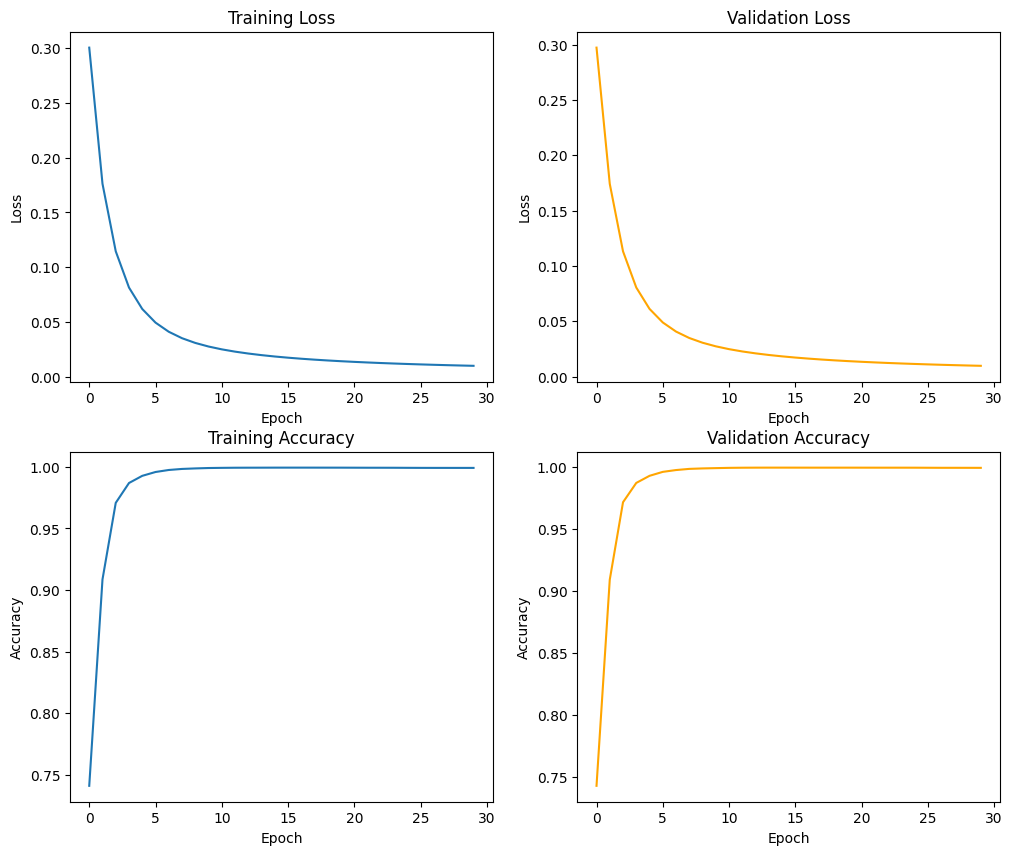

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(12, 10))
ax[0 , 0].plot ( train_losses )
ax[0 , 0].set(xlabel ='Epoch', ylabel ='Loss')
ax[0 , 0].set_title('Training Loss')

ax[0 , 1].plot(val_losses, 'orange')
ax[0 , 1].set(xlabel ='Epoch', ylabel ='Loss')
ax[0 , 1].set_title('Validation Loss')

ax[1 , 0].plot(train_accs)
ax[1 , 0].set(xlabel ='Epoch', ylabel ='Accuracy')
ax[1 , 0].set_title('Training Accuracy')

ax[1 , 1].plot(val_accs,'orange')
ax[1 , 1].set(xlabel ='Epoch', ylabel ='Accuracy')
ax[1 , 1].set_title('Validation Accuracy')

plt.show ()

In [ ]:
val_set_acc = compute_accuracy(X_val, y_val, theta)
test_set_acc = compute_accuracy(X_test, y_test, theta)

print(f'Validation Set Accuracy : { val_set_acc :.3f}')
print(f'Test Set Accuracy : { test_set_acc :.3f}')

Validation Set Accuracy : 0.999
Test Set Accuracy : 0.999


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import nltk
nltk.download('stopwords')

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
dataset_path = 'Twitter_Data.csv'
df = pd.read_csv(dataset_path)
df

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0
...,...,...
162975,why these 456 crores paid neerav modi not reco...,-1.0
162976,dear rss terrorist payal gawar what about modi...,-1.0
162977,did you cover her interaction forum where she ...,0.0
162978,there big project came into india modi dream p...,0.0


In [ ]:
def text_normalize(text):
    #Lowercasing
    text = text.lower()

    #retweet old acronym "RT" removal
    text = re.sub(r'\brt\b', '', text)

    #hyperlinks removal
    text = re.sub(r'https ?:\/\/.*[\ r\n]* ', '', text )

    #Punctuation removal
    text = re.sub(r'[^\w\s]', '', text)

    #remove stopwords
    stemmer = SnowballStemmer('english')
    words = text.split()
    words = [stemmer.stem(word) for word in words]
    text = ' '.join(words)

    return text


In [ ]:
df['clean_text'] = df['clean_text'].fillna('')

In [ ]:
vectorizer = TfidfVectorizer(max_features=2000)
X = vectorizer.fit_transform(df['clean_text']).toarray()

In [ ]:
intercept = np.ones((X.shape[0], 1))
X_b = np.concatenate((intercept, X), axis=1)

In [ ]:
n_classes = df['category'].nunique()
n_samples = df['category'].size

y = df['category'].to_numpy() + 1
y = y.astype(np.uint8)
y_encoded = np.array(
    [np.zeros(n_classes) for _ in range(n_samples)]
)
y_encoded[np.arange(n_samples), y] = 1

<ipython-input-26-d86a8cc2f58b>:5: RuntimeWarning: invalid value encountered in cast
  y = y.astype(np.uint8)


In [ ]:
val_size = 0.2
test_size = 0.125
random_state = 2
is_shuffle = True

X_train, X_val, y_train, y_val = train_test_split(
    X_b, y_encoded, test_size=val_size, random_state=random_state, shuffle=is_shuffle
)
X_train, X_test, y_train, y_test = train_test_split(
    X_train, y_train, test_size=test_size, random_state=random_state, shuffle=is_shuffle
)

In [ ]:
lr = 0.1
epochs = 200
batch_size = X_train.shape[0]
n_features = X_train.shape[1]

np.random.seed(random_state)
theta = np.random.uniform(
    size = (n_features, n_classes)
)

In [ ]:
train_accs = []
train_losses = []
val_accs = []
val_losses = []

for epoch in range(epochs):
    train_batch_losses = []
    train_batch_accs = []
    val_batch_losses = []
    val_batch_accs = []


    X_i = X_train
    y_i = y_train

    y_hat = predict(X_i, theta)
    train_loss = compute_loss(y_hat, y_i)

    gradient = compute_gradient(X_i, y_i, y_hat)

    theta = update_theta(theta, gradient, lr)

    train_batch_losses.append(train_loss)

    train_acc = compute_accuracy(X_train, y_train, theta)
    train_batch_accs.append(train_acc)

    y_val_hat = predict(X_val, theta)
    val_loss = compute_loss(y_val_hat, y_val)
    val_batch_losses.append(val_loss)

    val_acc = compute_accuracy(X_val, y_val, theta)
    val_batch_accs.append(val_acc)

    train_batch_loss = np.mean(train_batch_losses)
    train_batch_acc = np.mean(train_batch_accs)
    val_batch_loss = np.mean(val_batch_losses)
    val_batch_acc = np.mean(val_batch_accs)

    train_losses.append(train_batch_loss)
    val_losses.append(val_batch_loss)
    train_accs.append(train_batch_acc)
    val_accs.append(val_batch_acc)

    print(f'\nEPOCH { epoch + 1}:\tTraining loss : { train_batch_loss :.3f}\ tValidation loss : {val_batch_loss:.3f}')




EPOCH 1:	Training loss : 0.376\ tValidation loss : 0.376

EPOCH 2:	Training loss : 0.376\ tValidation loss : 0.376

EPOCH 3:	Training loss : 0.376\ tValidation loss : 0.375

EPOCH 4:	Training loss : 0.375\ tValidation loss : 0.375

EPOCH 5:	Training loss : 0.375\ tValidation loss : 0.375

EPOCH 6:	Training loss : 0.375\ tValidation loss : 0.374

EPOCH 7:	Training loss : 0.374\ tValidation loss : 0.374

EPOCH 8:	Training loss : 0.374\ tValidation loss : 0.374

EPOCH 9:	Training loss : 0.374\ tValidation loss : 0.374

EPOCH 10:	Training loss : 0.374\ tValidation loss : 0.373

EPOCH 11:	Training loss : 0.373\ tValidation loss : 0.373

EPOCH 12:	Training loss : 0.373\ tValidation loss : 0.373

EPOCH 13:	Training loss : 0.373\ tValidation loss : 0.373

EPOCH 14:	Training loss : 0.373\ tValidation loss : 0.372

EPOCH 15:	Training loss : 0.372\ tValidation loss : 0.372

EPOCH 16:	Training loss : 0.372\ tValidation loss : 0.372

EPOCH 17:	Training loss : 0.372\ tValidation loss : 0.372

EPOCH

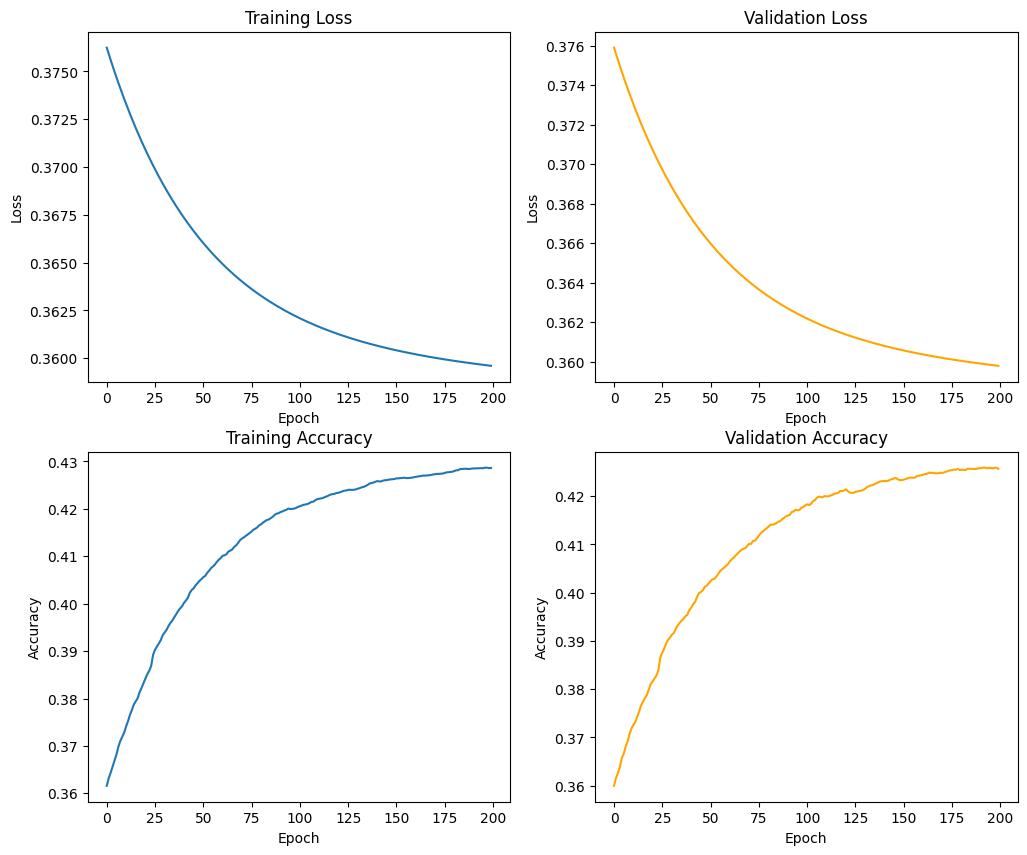

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(12, 10))
ax[0 , 0].plot ( train_losses )
ax[0 , 0].set(xlabel ='Epoch', ylabel ='Loss')
ax[0 , 0].set_title('Training Loss')

ax[0 , 1].plot(val_losses, 'orange')
ax[0 , 1].set(xlabel ='Epoch', ylabel ='Loss')
ax[0 , 1].set_title('Validation Loss')

ax[1 , 0].plot(train_accs)
ax[1 , 0].set(xlabel ='Epoch', ylabel ='Accuracy')
ax[1 , 0].set_title('Training Accuracy')

ax[1 , 1].plot(val_accs,'orange')
ax[1 , 1].set(xlabel ='Epoch', ylabel ='Accuracy')
ax[1 , 1].set_title('Validation Accuracy')

plt.show ()

